# Heart Disease Dataset EDA (*Exploratory Data Analysis*)

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

random_state = np.random.RandomState(42)

### Import own utils

In [2]:
from utils.dataset_processing import *

### Downloading the Dataset

In [3]:
train_dataset = pd.read_csv('http://ps2.railsreactor.net/datasets/medicine/heart_train.csv')
test_dataset = pd.read_csv('http://ps2.railsreactor.net/datasets/medicine/heart_test.csv')

In [4]:
initial_dataset = pd.concat((train_dataset, test_dataset))
dataset = initial_dataset.copy()

In [5]:
dataset.size

4242

In [6]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
1,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
2,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
3,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [7]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
dataset['sex'] = dataset['sex'].apply(lambda x : 'male' if x == 1 else 'female')
dataset['fbs'] = dataset['fbs'].apply(lambda x : True if x == 1 else False)

In [9]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,female,3,140,239,False,1,151,0,1.8,2,2,2,1
1,66,male,1,160,246,False,1,120,1,0.0,1,3,1,0
2,55,female,0,128,205,False,2,130,1,2.0,1,1,3,0
3,57,male,0,110,335,False,1,143,1,3.0,1,1,3,0
4,71,female,2,110,265,True,0,130,0,0.0,2,1,2,1


#### Numeric columns

In [10]:
dataset[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].head()

,age,trestbps,chol,thalach,oldpeak
0,69,140,239,151,1.8
1,66,160,246,120,0.0
2,55,128,205,130,2.0
3,57,110,335,143,3.0
4,71,110,265,130,0.0


#### Categorical columns

In [11]:
dataset[['sex', 'cp', 'restecg', 'slope', 'ca', 'thal']].head()

,sex,cp,restecg,slope,ca,thal
0,female,3,1,2,2,2
1,male,1,1,1,3,1
2,female,0,2,1,1,3
3,male,0,1,1,1,3
4,female,2,0,2,1,2


#### Boolean columns

In [12]:
dataset[['fbs', 'exang', 'target']].head()

,fbs,exang,target
0,False,0,1
1,False,1,0
2,False,1,0
3,False,1,0
4,True,0,1


### Detecting Missing values and Data Cleaning

In [13]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### There is **no** missing values

### Values Distribution

In [14]:
dataset[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


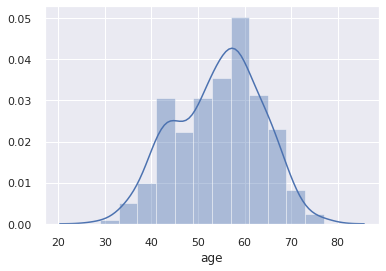

In [15]:
sns.distplot(dataset['age'])

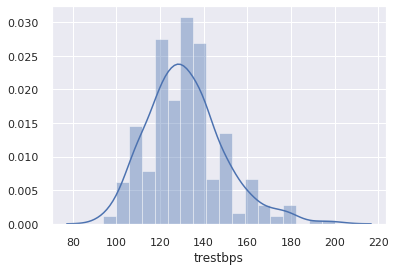

In [16]:
sns.distplot(dataset['trestbps'])

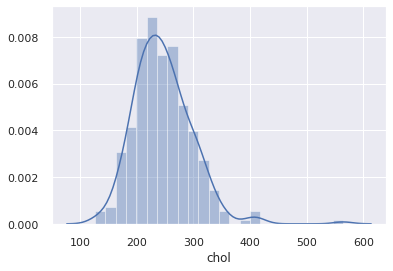

In [17]:
sns.distplot(dataset['chol'])

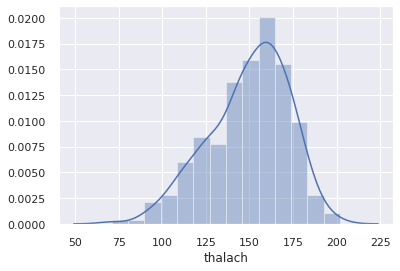

In [18]:
sns.distplot(dataset['thalach'])

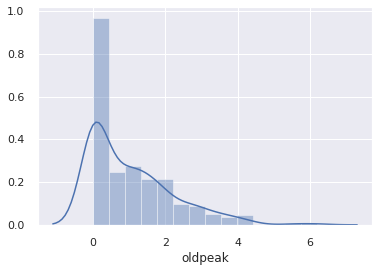

In [19]:
sns.distplot(dataset['oldpeak'])

### Frequency distribution of values

In [20]:
dataset['sex'].value_counts()

male      207
female     96
Name: sex, dtype: int64

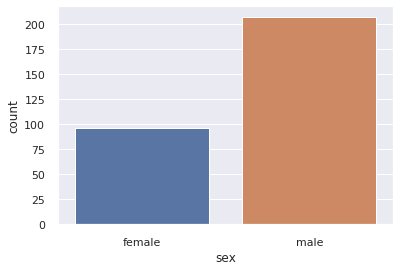

In [21]:
sns.countplot(dataset['sex'])

In [22]:
dataset['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

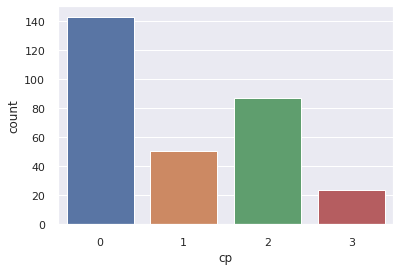

In [23]:
sns.countplot(dataset['cp'])

In [24]:
dataset['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

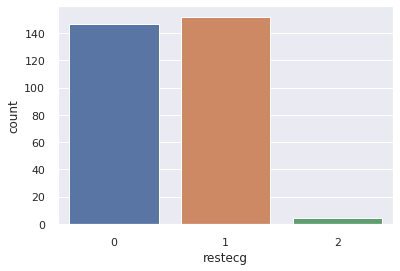

In [25]:
sns.countplot(dataset['restecg'])

In [26]:
dataset['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

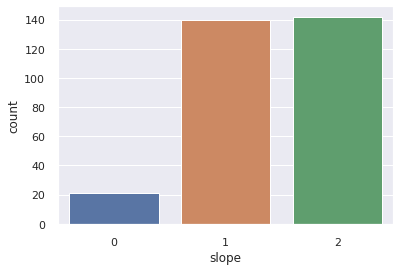

In [27]:
sns.countplot(dataset['slope'])

In [28]:
dataset['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

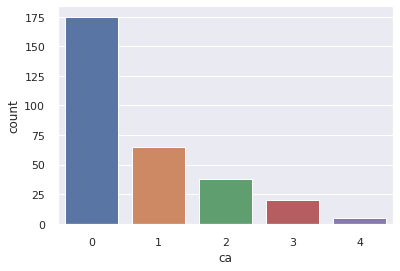

In [29]:
sns.countplot(dataset['ca'])

In [30]:
dataset['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

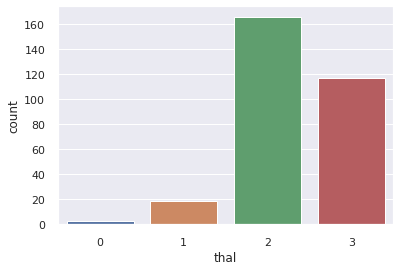

In [31]:
sns.countplot(dataset['thal'])

In [32]:
dataset['fbs'].value_counts()

False    258
True      45
Name: fbs, dtype: int64

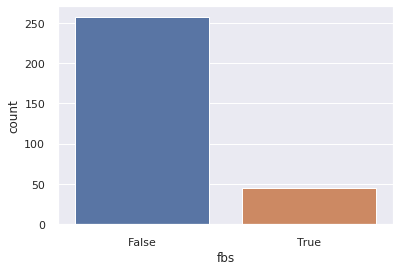

In [33]:
sns.countplot(dataset['fbs'])

In [34]:
dataset['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

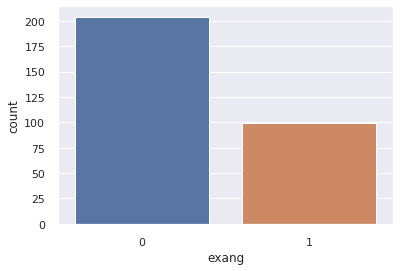

In [35]:
sns.countplot(dataset['exang'])

In [36]:
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

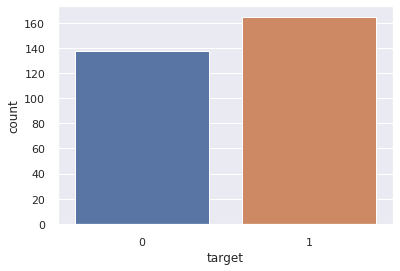

In [37]:
sns.countplot(dataset['target'])

### Correlation between the columns

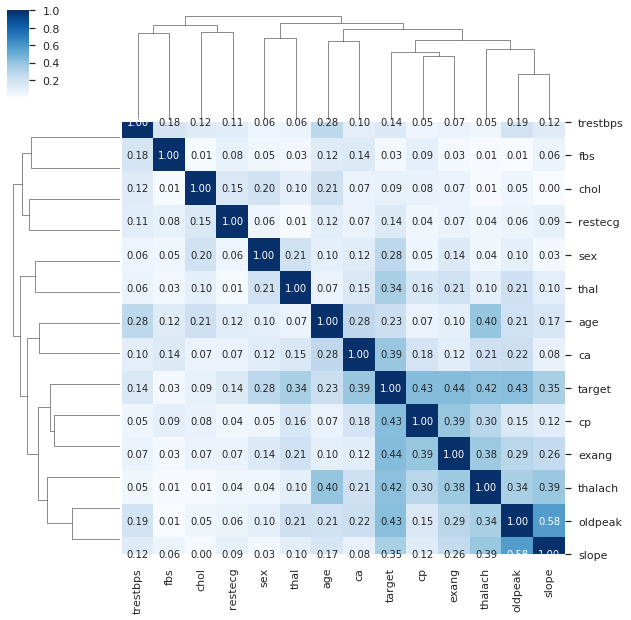

In [38]:
sns.clustermap(data = initial_dataset.corr().abs(),annot=True, fmt = ".2f", cmap = 'Blues');

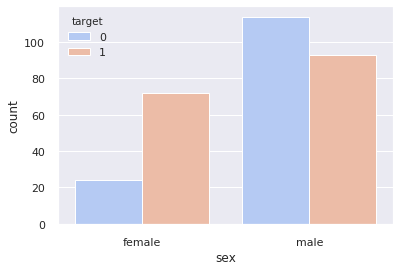

In [39]:
sns.countplot(dataset['sex'], data = dataset, hue = 'target', palette='coolwarm')

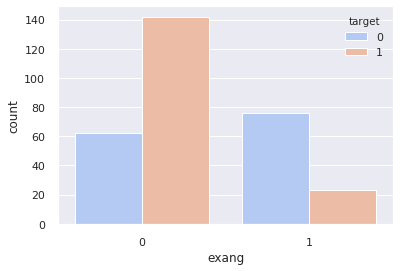

In [40]:
sns.countplot(dataset['exang'], data = dataset, hue = 'target', palette='coolwarm')

### Drop columns with small correlation with **target**

In [41]:
dataset.drop(columns=['fbs', 'chol'], inplace=True)

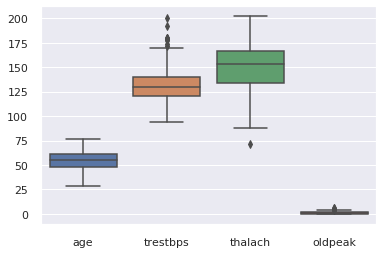

In [42]:
sns.boxplot(data=dataset[['age', 'trestbps', 'thalach', 'oldpeak']])

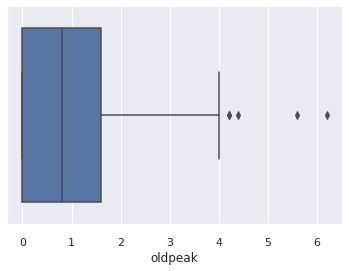

In [43]:
sns.boxplot(dataset['oldpeak'])

In [44]:
outliers_to_drop = detect_outliers(dataset, 2, ['trestbps', 'thalach', 'oldpeak'])
outliers_to_drop

[]

In [45]:
dataset = dataset.drop(outliers_to_drop, axis = 0).reset_index(drop=True)

### Data normalization

In [46]:
dataset.dtypes

age           int64
sex          object
cp            int64
trestbps      int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [47]:
dataset['age'].astype('float64', copy=False)
dataset['trestbps'].astype('float64', copy=False)
dataset['thalach'].astype('float64', copy=False)

dataset['age'] = normalize_data(dataset['age'].to_numpy())
dataset['trestbps'] = normalize_data(dataset['trestbps'].to_numpy())
dataset['thalach'] = normalize_data(dataset['thalach'].to_numpy())
dataset['oldpeak'] = normalize_data(dataset['oldpeak'].to_numpy())

### Data Encoding

In [48]:
dataset = pd.get_dummies(dataset, columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'])

In [49]:
dataset.head()

,age,trestbps,thalach,exang,oldpeak,target,sex_female,sex_male,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1.613930,0.478391,0.059173,0,0.655990,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1.283063,1.620649,-1.296472,1,-0.896862,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0.069886,-0.206964,-0.859167,1,0.828529,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0.290464,-1.234996,-0.290671,1,1.691225,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
4,1.834507,-1.234996,-0.859167,0,-0.896862,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


### Splitting the Dataset into Test set and Train set

In [50]:
from sklearn.model_selection import train_test_split

X, y = [dataset.drop(columns='target'), dataset['target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

## Pandas Profiling Report

In [51]:
pp.ProfileReport(initial_dataset)